In [3]:
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('../archive/fashion-mnist_test.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df['label'].value_counts()

label
0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: count, dtype: int64

In [6]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9254,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1561,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1670,4,0,0,0,0,0,0,0,2,0,...,0,0,120,192,118,0,0,0,0,0
6087,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6669,2,0,0,0,0,0,0,0,0,18,...,2,1,0,0,157,120,50,0,0,0


In [18]:
import json
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
inp = test.iloc[0, 1:].values
inp = inp.tolist()
print(json.dumps(inp))
print(test.iloc[0, 0])

[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 76, 80, 88, 105, 88, 86, 78, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 159, 145, 140, 116, 22, 113, 133, 145, 157, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 45, 125, 140, 130, 116, 110, 122, 116, 109, 133, 140, 127, 47, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 101, 138, 134, 133, 137, 114, 109, 113, 111, 101, 138, 134, 134, 138, 104, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 35, 148, 124, 129, 130, 149, 136, 120, 122, 121, 132, 148, 128, 128, 127, 148, 32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 87, 149, 119, 135, 124, 132, 157, 128, 133, 134, 165, 134, 125, 134, 120, 151, 87, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 112, 150, 118, 143, 126, 116, 156, 138, 126, 133, 159, 112, 129, 144, 117, 150, 113, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128, 143, 117, 153, 135, 101, 153, 161, 109, 140, 163, 102, 135, 151, 118, 144, 127, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 145, 137, 120, 159, 128, 88, 143, 181, 99, 148, 151, 86, 132, 159, 119, 140, 145, 0, 0, 0, 0, 0, 0

In [5]:
train.shape, test.shape

((8000, 785), (2000, 785))

In [6]:
class Wine(Dataset):
    def __init__(self):
        data = train
        self.x = torch.tensor(data.iloc[:, 1:].values, dtype=torch.float32)
        self.x /= 255
        self.x = self.x.reshape(-1, 1, 28, 28)
        self.y = torch.tensor(data.iloc[:, 0].values, dtype=torch.int64)
        self.n_samples = data.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.n_samples

In [7]:
dataset = Wine()
features, label = dataset[0]
print(f'features: {features},\n label: {label}')

features: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.000

In [8]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        self.model = None
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        self.fc1 = nn.Linear(in_features=7*7*64, out_features=120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=120, out_features=10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        x = x.view(-1,64*7*7)

        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)

        return x
    
    
    def predict(self, inputs):
        self.eval()
        with torch.no_grad():
            output =  self(inputs)
            _, predicted = torch.max(output, 1)
        return predicted

In [9]:
model = CNN()
critereon = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
train_loader = DataLoader(dataset=dataset, batch_size=4, shuffle=True)

In [10]:
# Check DataLoader configuration
batch_size = next(iter(train_loader))[0].shape[0]
print(f"Batch size: {batch_size}")
print(f"Number of batches: {len(train_loader)}")

Batch size: 4
Number of batches: 2000


In [11]:
no_of_epoch = 10

for epoch in range(no_of_epoch):
    model.train()
    for idx, (inputs, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(inputs)
        loss = critereon(output, targets)
        loss.backward()
        optimizer.step()

    print(f'epoch: {epoch+1}/{no_of_epoch}, loss: {loss.item()}')

epoch: 1/10, loss: 0.44041842222213745
epoch: 2/10, loss: 0.7099641561508179
epoch: 3/10, loss: 1.6269629001617432
epoch: 4/10, loss: 1.8913079500198364
epoch: 5/10, loss: 0.06599704176187515
epoch: 6/10, loss: 0.20439836382865906
epoch: 7/10, loss: 0.04283798485994339
epoch: 8/10, loss: 0.81130051612854
epoch: 9/10, loss: 0.8109903335571289
epoch: 10/10, loss: 0.48265910148620605


In [12]:
torch.save(model.state_dict(), 'model_weight.pth')

In [13]:
model = CNN()
model.load_state_dict(torch.load('model_weight.pth'))

test = test/255.0
X_test = torch.tensor(test.iloc[:, 1:].values, dtype=torch.float32)
Y_test = torch.tensor(test.iloc[:, 0].values, dtype=torch.int64)
X_train = torch.tensor(train.iloc[:, 1:].values, dtype=torch.float32)
Y_train = torch.tensor(train.iloc[:, 0].values, dtype=torch.int64)

X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)
X_test.shape

torch.Size([2000, 1, 28, 28])

In [1]:
X_test[0]

NameError: name 'X_test' is not defined

In [16]:
X=X_train
output = model.predict(X)
X.shape, output.shape

(torch.Size([8000, 1, 28, 28]), torch.Size([8000]))

Accuracy: 74.96%


<Axes: >

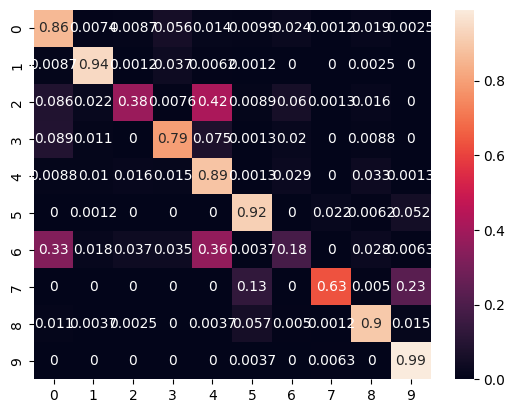

In [17]:
Y= Y_train
correct = (output == Y).sum().item()
total = Y.size(0)
print('Accuracy: {:.2f}%'.format(100 * correct / total))

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y, output, normalize='true')
sns.heatmap(cm, annot=True)



In [18]:
correct, output

(5997, tensor([8, 5, 4,  ..., 2, 9, 7]))

In [17]:
import io
from fastapi import FastAPI, File, UploadFile
from pydantic import BaseModel
from fastapi.responses import JSONResponse
from torchvision import transforms
from PIL import Image

app = FastAPI()

transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((28, 28)),
    transforms.ToTensor()
])

class ImageInput(BaseModel):
    image: UploadFile

@app.post("/predict")
async def predict(data: ImageInput):
    contents = data.image.file.read()
    print(f'content = {contents}')
    image = Image.open(io.BytesIO(contents))
    print(f'image = {image}')
    image = transforms(image).unsqueeze(0)
    print(f'image = {image}')
    model = CNN()
    model.load_model('fashion_mnist_pytorch_full_cnn_model.pth')
    output = model.predict(image)
    return JSONResponse(content={"class": output.item()})

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=8000)



RuntimeError: asyncio.run() cannot be called from a running event loop